<a href="https://colab.research.google.com/github/fnavab/APS360-project/blob/main/Final_16k_AlexNet__RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Data loading
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import random
import torchvision.transforms as transforms
import torch
import numpy as np
import os
import torchvision
from torch.utils.data.sampler import SubsetRandomSampler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [4]:
  train_dir = '/content/gdrive/My Drive/Colab Notebooks/combined_features/train'
  trainset = torchvision.datasets.DatasetFolder(train_dir, loader=torch.load, extensions=('.tensor'))

In [5]:
test_dir = '/content/gdrive/My Drive/Colab Notebooks/combined_features/test'

test_set = torchvision.datasets.DatasetFolder(test_dir, loader=torch.load, extensions=('.tensor'))

In [6]:
val_dir = '/content/gdrive/My Drive/Colab Notebooks/combined_features/val'
val_set= torchvision.datasets.DatasetFolder(val_dir, loader=torch.load, extensions=('.tensor'))


In [7]:
len(test_set)

3012

In [8]:
len(val_set)

3026

In [9]:
len(trainset)

12169

In [10]:
X_test = np.array([x.numpy() for x,_ in test_set])
y_test= np.array([y for _,y in test_set])

X_test = X_test.reshape((X_test.shape[0], -1))


In [11]:
X_val = np.array([x.numpy() for x,_ in val_set])
y_val= np.array([y for _,y in val_set])

X_val = X_val.reshape((X_val.shape[0],-1))

In [12]:

X_train = np.array([x.numpy() for x,_ in trainset])
y_train= np.array([y for _,y in trainset])

X_train = X_train.reshape((X_train.shape[0],-1))


In [22]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
import time
#TUNE n_estimators
model = RandomForestClassifier(n_estimators=75, criterion="entropy",max_depth=15,)

# Fit the model to our training data
start_time=time.time()

classifier=model.fit(X_train, y_train)
end_time=time.time()
print("Total time: " , (end_time-start_time))

# Make predictions
testing_predicted = model.predict(X_test)
score=accuracy_score(testing_predicted,y_test)
print("RF Test:", score)

Total time:  79.96517944335938
RF Test: 0.7841965471447543


Confusion matrix, without normalization
[[346  12   1   6   5   0   6   4]
 [ 20 311   1   0   8   9   8  17]
 [  2   5 313  44   1   7   4   3]
 [  5   7  42 296   1  16   7   1]
 [ 17  21   2   0 271  12  14  28]
 [  1   2   8   4   2 354  30   1]
 [ 10  10  11  13   5  46 261   6]
 [ 26  28   1   5  24   3  14 274]]
Normalized confusion matrix
[[0.91 0.03 0.   0.02 0.01 0.   0.02 0.01]
 [0.05 0.83 0.   0.   0.02 0.02 0.02 0.05]
 [0.01 0.01 0.83 0.12 0.   0.02 0.01 0.01]
 [0.01 0.02 0.11 0.79 0.   0.04 0.02 0.  ]
 [0.05 0.06 0.01 0.   0.74 0.03 0.04 0.08]
 [0.   0.   0.02 0.01 0.   0.88 0.07 0.  ]
 [0.03 0.03 0.03 0.04 0.01 0.13 0.72 0.02]
 [0.07 0.07 0.   0.01 0.06 0.01 0.04 0.73]]


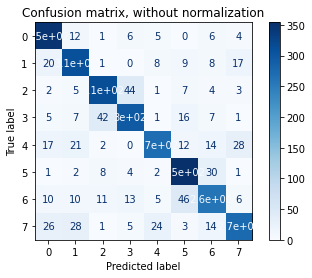

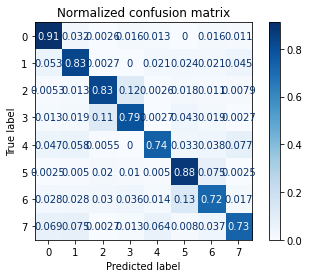

In [17]:
from sklearn.metrics import plot_confusion_matrix


class_names=[0,1,2,3,4,5,6,7]
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

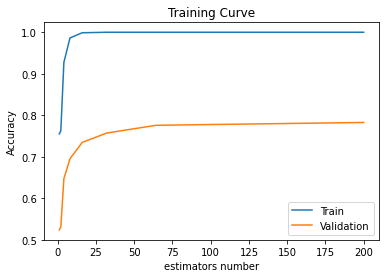

In [18]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
train_results = []
val_results = []
for estimator in n_estimators:
   rf = RandomForestClassifier(n_estimators=estimator, criterion="entropy")
   rf.fit(X_train, y_train)
   train_pred = rf.predict(X_train)
   train_score=accuracy_score(train_pred,y_train)
   train_results.append(train_score)
   val_pred = rf.predict(X_val)
   val_score=accuracy_score(val_pred,y_val)
   val_results.append(val_score)


plt.title("Training Curve")
plt.plot(n_estimators, train_results, label="Train")
plt.plot(n_estimators, val_results, label="Validation")
plt.xlabel("estimators number")
plt.ylabel("Accuracy")
plt.legend(loc='best')
plt.show() 


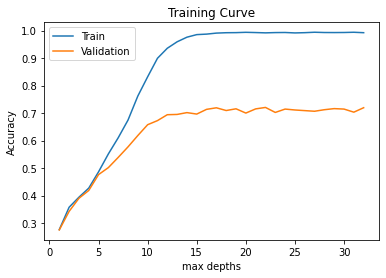

In [19]:
max_depths = np.linspace(1, 32, 32, endpoint=True)

train_results = []
val_results = []
for max_depth in max_depths:
   rf = RandomForestClassifier(n_estimators=10, criterion="entropy", max_depth=max_depth)
   rf.fit(X_train, y_train)
   train_pred = rf.predict(X_train)
   train_score=accuracy_score(train_pred,y_train)
   train_results.append(train_score)
   val_pred = rf.predict(X_val)
   val_score=accuracy_score(val_pred,y_val)
   val_results.append(val_score)


plt.title("Training Curve")
plt.plot(max_depths, train_results, label="Train")
plt.plot(max_depths, val_results, label="Validation")
plt.xlabel("max depths")
plt.ylabel("Accuracy")
plt.legend(loc='best')
plt.show() 